# ChIP-seq analysis on liver samples from mice to analyze the effect of CtBP2

# by Jonas Haesevoets

# The transcriptional corepressor CtBP2 serves as a metabolite sensor orchestrating hepatic glucose and lipid homeostasis

# ChiP-seq analysis

link to the research paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8563733/

link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE127660

# Description

Recent research showed that intermediary metabolites can have roles as multifunctional regulators of widely different cellullar processes with a significant impact on many bioprocesses and their associated pathologies. A great example of this the fact that among the abnormalities associated with obesity unsurpressed gluconeogenesis coupled with increased lipogenesis is a key feature of the liver of obese patients. The incoming fatty acids into the liver get converted into fatty acyl-CoA who get metabolized to acetyl-CoA. Acetyl-CoA in turns is able to activate pyruvate carboxylase which in turn stimulates gluconeogenesis. 

To elucidate the role of CtBP2 in the metabolism of mouse livers a chip-seq analysis was performed with an input sample of mice (without antibody) and a treated sample (with anti-CtBP2). By analyzing this data the researchers were able to identified a metabolic system regulated by the co-repressor CtBP2 who acts upon the hepatic glucose and lipid homeostasis.

All pictures generated in my assignment were embedded and checked by myself if they worked in a separate notebook via anaconda.



# 1) download the datasets

In [1]:
fastq-dump SRR8649145

2021-12-12T12:57:23 fastq-dump.2.9.6 sys: timeout exhausted while reading file within network system module - mbedtls_ssl_read returned -76 ( NET - Reading information from the socket failed )
2021-12-12T13:05:26 fastq-dump.2.9.6 sys: timeout exhausted while reading file within network system module - mbedtls_ssl_read returned -76 ( NET - Reading information from the socket failed )
Read 38476546 spots for SRR8649145
Written 38476546 spots for SRR8649145


In [2]:
fastq-dump SRR8649146

Read 34183329 spots for SRR8649146
Written 34183329 spots for SRR8649146


# 2) Quality control with fastqc

In [3]:
/usr/bin/fastqc SRR8649145.fastq

Started analysis of SRR8649145.fastq
Approx 5% complete for SRR8649145.fastq
Approx 10% complete for SRR8649145.fastq
Approx 15% complete for SRR8649145.fastq
Approx 20% complete for SRR8649145.fastq
Approx 25% complete for SRR8649145.fastq
Approx 30% complete for SRR8649145.fastq
Approx 35% complete for SRR8649145.fastq
Approx 40% complete for SRR8649145.fastq
Approx 45% complete for SRR8649145.fastq
Approx 50% complete for SRR8649145.fastq
Approx 55% complete for SRR8649145.fastq
Approx 60% complete for SRR8649145.fastq
Approx 65% complete for SRR8649145.fastq
Approx 70% complete for SRR8649145.fastq
Approx 75% complete for SRR8649145.fastq
Approx 80% complete for SRR8649145.fastq
Approx 85% complete for SRR8649145.fastq
Approx 90% complete for SRR8649145.fastq
Approx 95% complete for SRR8649145.fastq
Analysis complete for SRR8649145.fastq


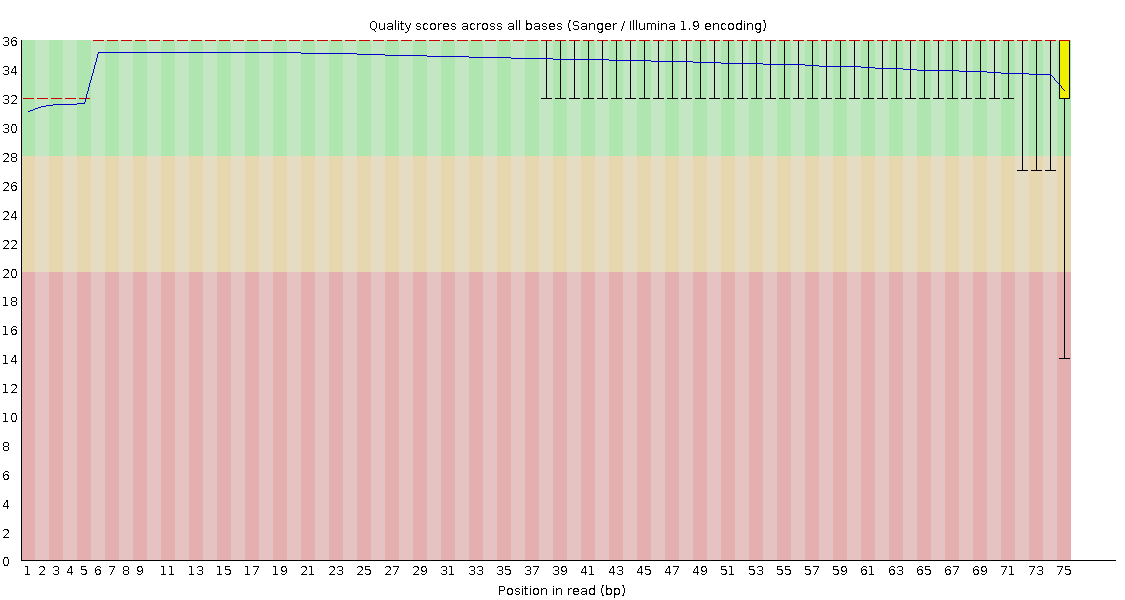

In [4]:
/usr/bin/fastqc SRR8649146.fastq

Started analysis of SRR8649146.fastq
Approx 5% complete for SRR8649146.fastq
Approx 10% complete for SRR8649146.fastq
Approx 15% complete for SRR8649146.fastq
Approx 20% complete for SRR8649146.fastq
Approx 25% complete for SRR8649146.fastq
Approx 30% complete for SRR8649146.fastq
Approx 35% complete for SRR8649146.fastq
Approx 40% complete for SRR8649146.fastq
Approx 45% complete for SRR8649146.fastq
Approx 50% complete for SRR8649146.fastq
Approx 55% complete for SRR8649146.fastq
Approx 60% complete for SRR8649146.fastq
Approx 65% complete for SRR8649146.fastq
Approx 70% complete for SRR8649146.fastq
Approx 75% complete for SRR8649146.fastq
Approx 80% complete for SRR8649146.fastq
Approx 85% complete for SRR8649146.fastq
Approx 90% complete for SRR8649146.fastq
Approx 95% complete for SRR8649146.fastq
Analysis complete for SRR8649146.fastq


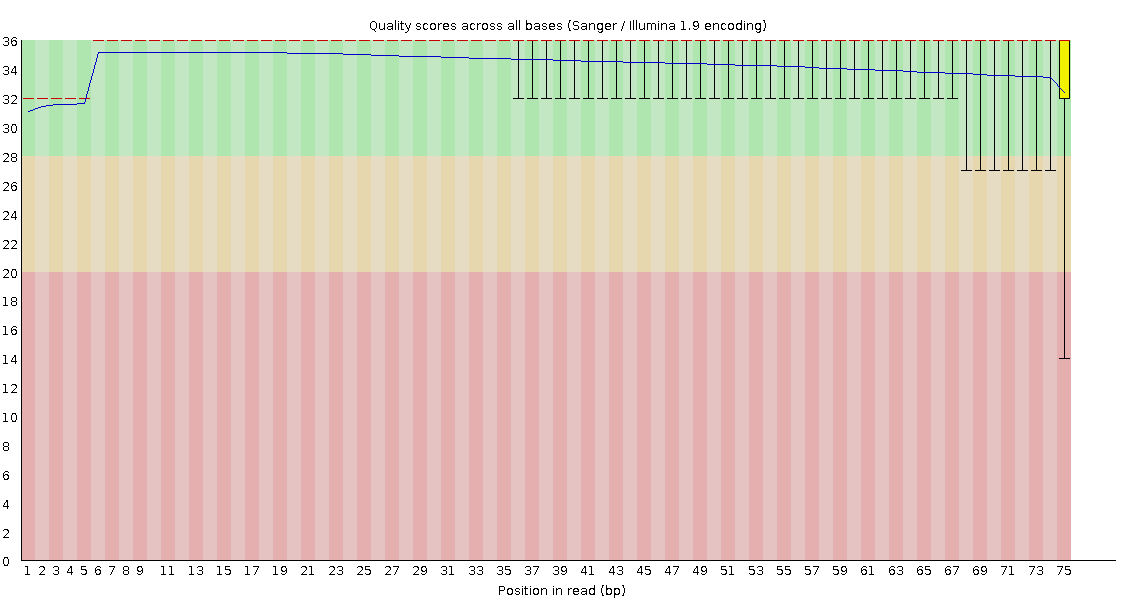

# 3) Alignment of the chip-seq reads

In [5]:
bowtie2 -x /mnt/storage/data/resources/mm10/mm10 SRR8649145.fastq -p 8 -S treated.sam



38476546 reads; of these:
  38476546 (100.00%) were unpaired; of these:
    5797462 (15.07%) aligned 0 times
    27279079 (70.90%) aligned exactly 1 time
    5400005 (14.03%) aligned >1 times
84.93% overall alignment rate


In [6]:
bowtie2 -x /mnt/storage/data/resources/mm10/mm10 SRR8649146.fastq -p 8 -S control.sam


34183329 reads; of these:
  34183329 (100.00%) were unpaired; of these:
    798389 (2.34%) aligned 0 times
    25133627 (73.53%) aligned exactly 1 time
    8251313 (24.14%) aligned >1 times
97.66% overall alignment rate


In [7]:
samtools view -S -b treated.sam > treated.bam

In [8]:
samtools view -S -b control.sam > control.bam

check amount of reads in the bam files

In [9]:
samtools view -c treated.bam

32679084


In [11]:
samtools view -c control.bam

34183329


check amount of actually mapped reads

In [12]:
samtools view -c -F 260 treated.bam

32679084


In [13]:
samtools view -c -F 260 control.bam

33384940


generate corresponding bai files

In [14]:
samtools sort -O bam -o treated.sorted.bam treated.bam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...


In [15]:
samtools index treated.sorted.bam

In [16]:
samtools sort -O bam -o control.sorted.bam control.bam

[bam_sort_core] merging from 10 files and 1 in-memory blocks...


In [17]:
samtools index control.sorted.bam

visualize the bam and corresponding bai files in IGV for the target gene 

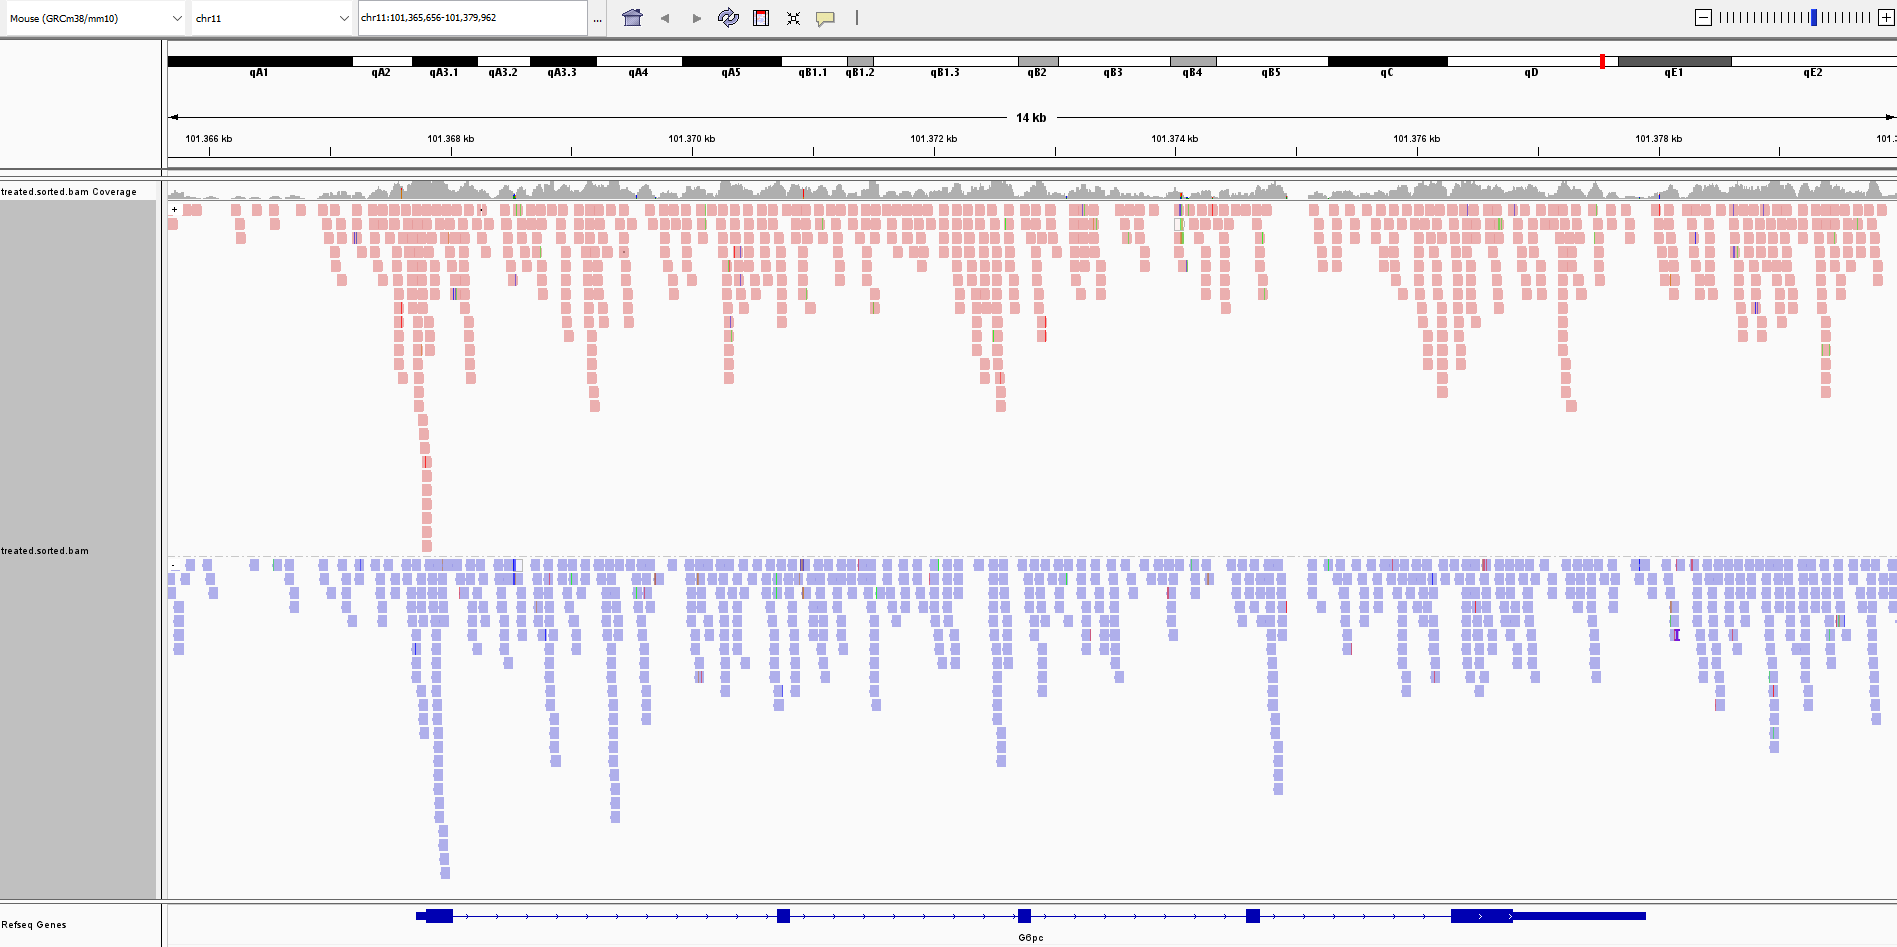

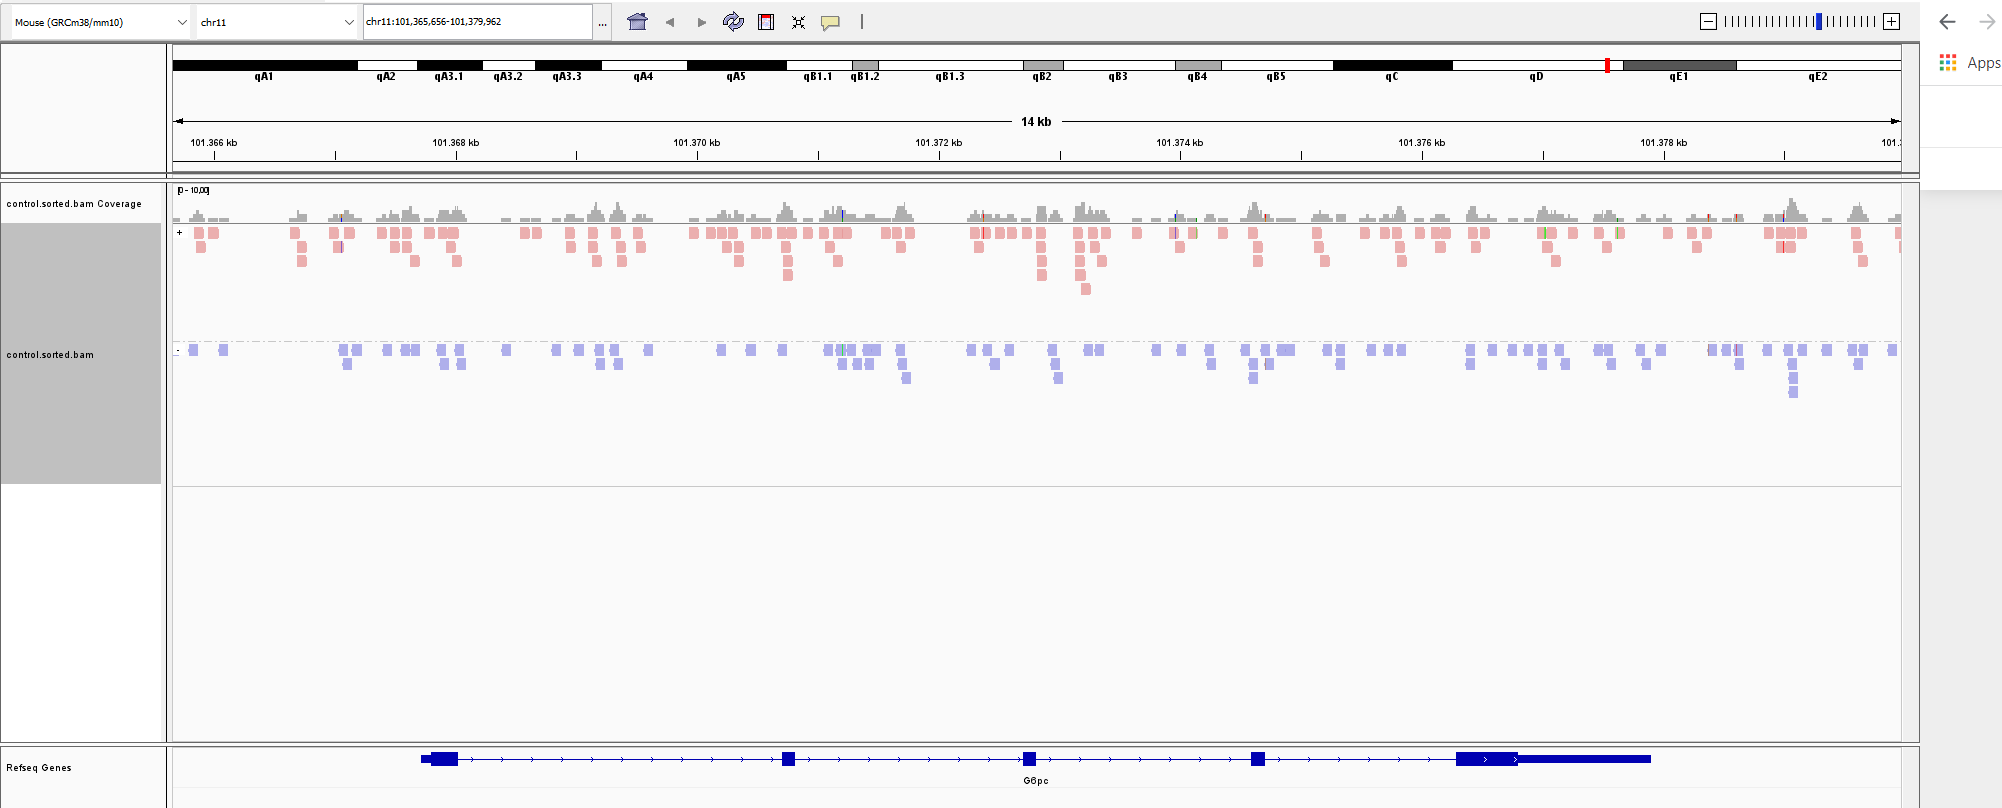

# 4) generate genome wide coverage plots

In [18]:
bamCoverage -b treated.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2730871774 -o treated.bw

normalization: 1x (effective genome size 2730871774)
bamFilesList: ['treated.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


visualize it

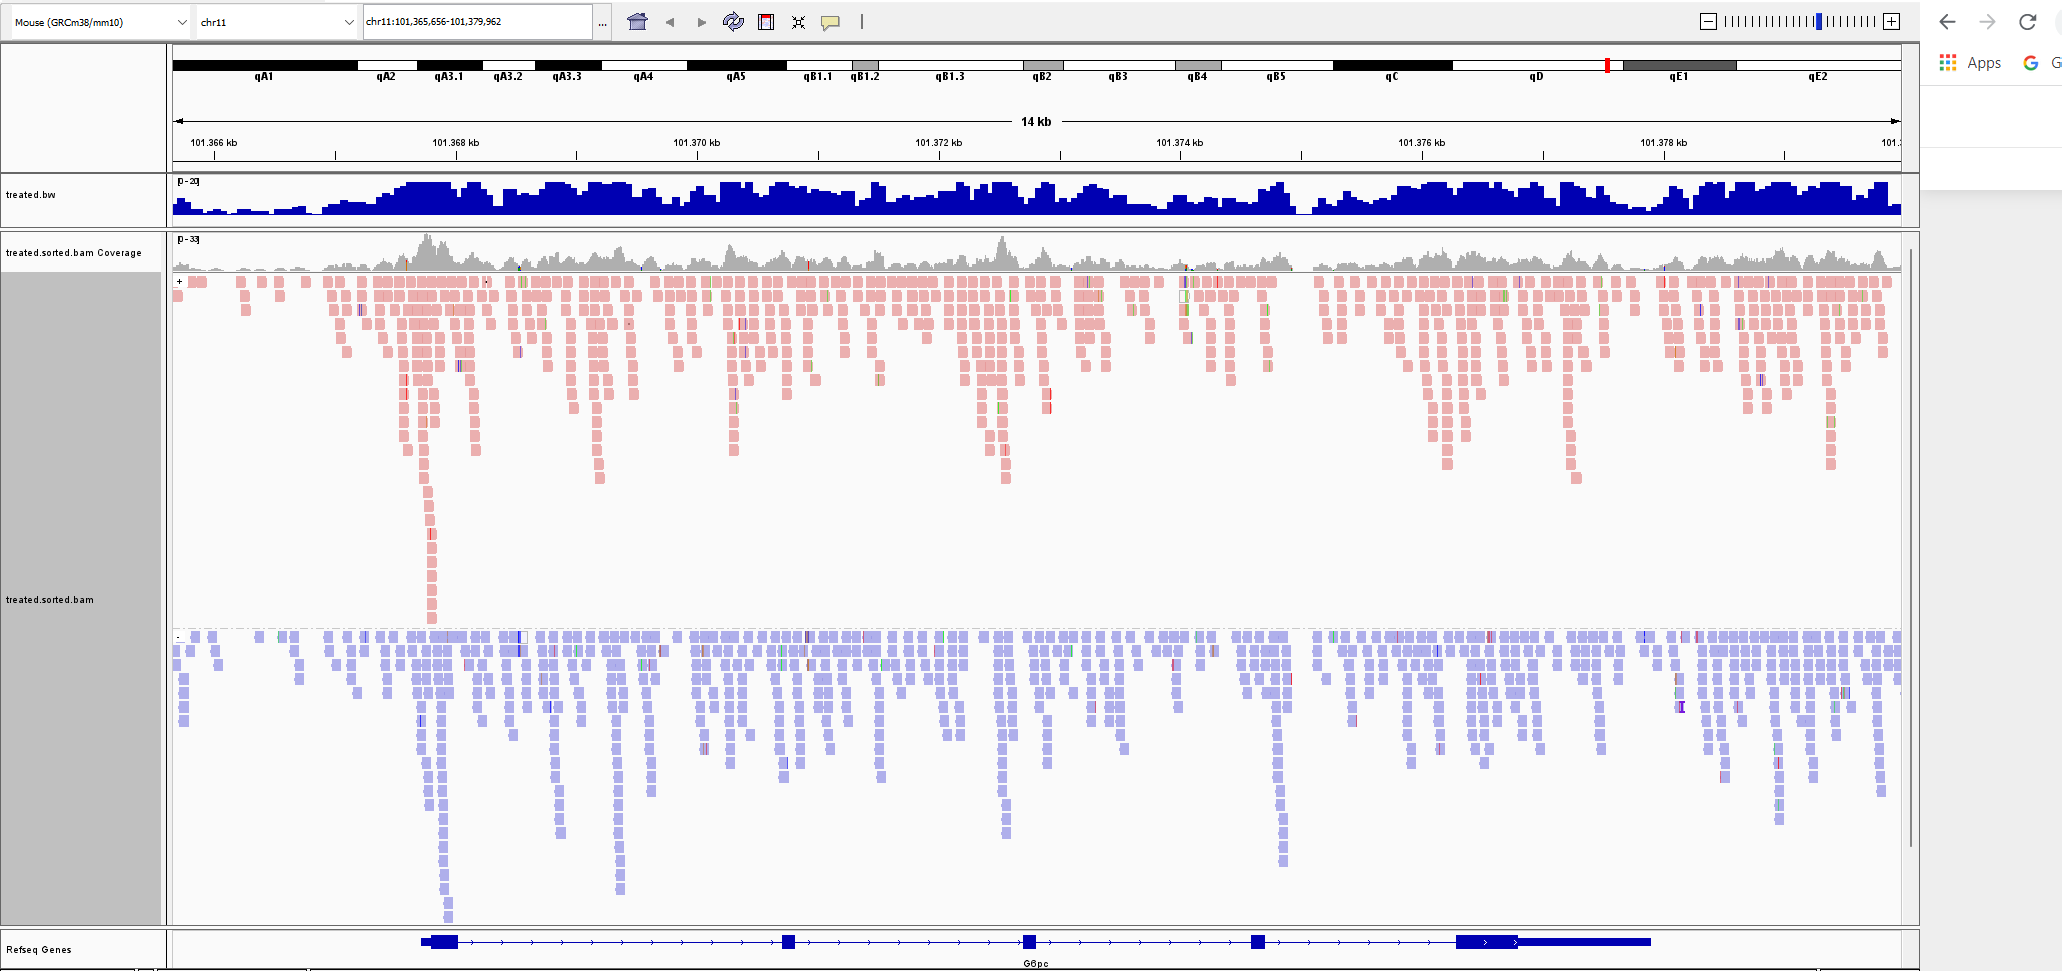

In [19]:
bamCoverage -b control.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2730871774 -o control.bw

normalization: 1x (effective genome size 2730871774)
bamFilesList: ['control.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


visualize it

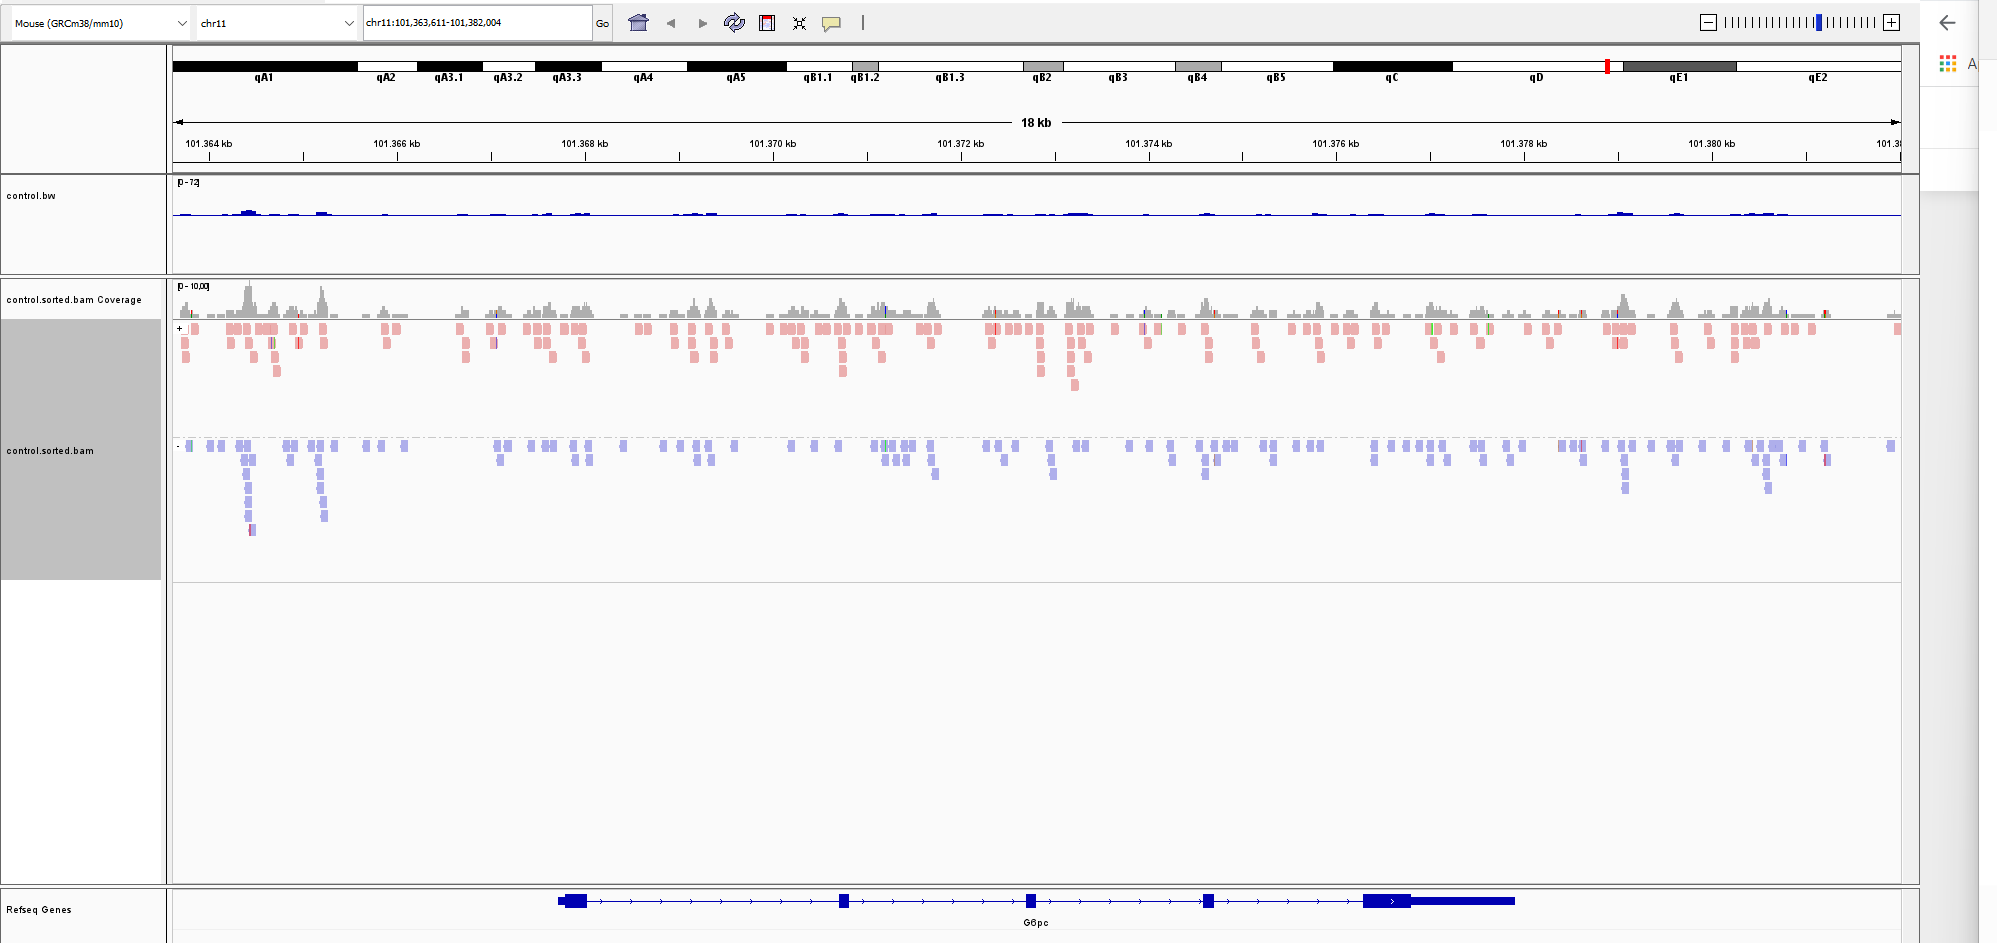

# 5) peak calling with macs2

In [20]:
macs2 callpeak -t treated.sorted.bam -c control.sorted.bam -n resultmacs2 -g hs -q 0.05

INFO  @ Sun, 12 Dec 2021 16:24:07: 
# Command line: callpeak -t treated.sorted.bam -c control.sorted.bam -n resultmacs2 -g hs -q 0.05
# ARGUMENTS LIST:
# name = resultmacs2
# format = AUTO
# ChIP-seq file = ['treated.sorted.bam']
# control file = ['control.sorted.bam']
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Sun, 12 Dec 2021 16:24:07: #1 read tag files... 
INFO  @ Sun, 12 Dec 2021 16:24:07: #1 read treatment tags... 
INFO  @ Sun, 12 Dec 2021 16:24:07: Detected format is: BAM 
INFO  @ Sun, 12 Dec 2021 16:24:07: * Input file is gzipped. 
INFO  @ Sun, 12 Dec 2021 16:24:09:  1000

visualize the peaks in IGV

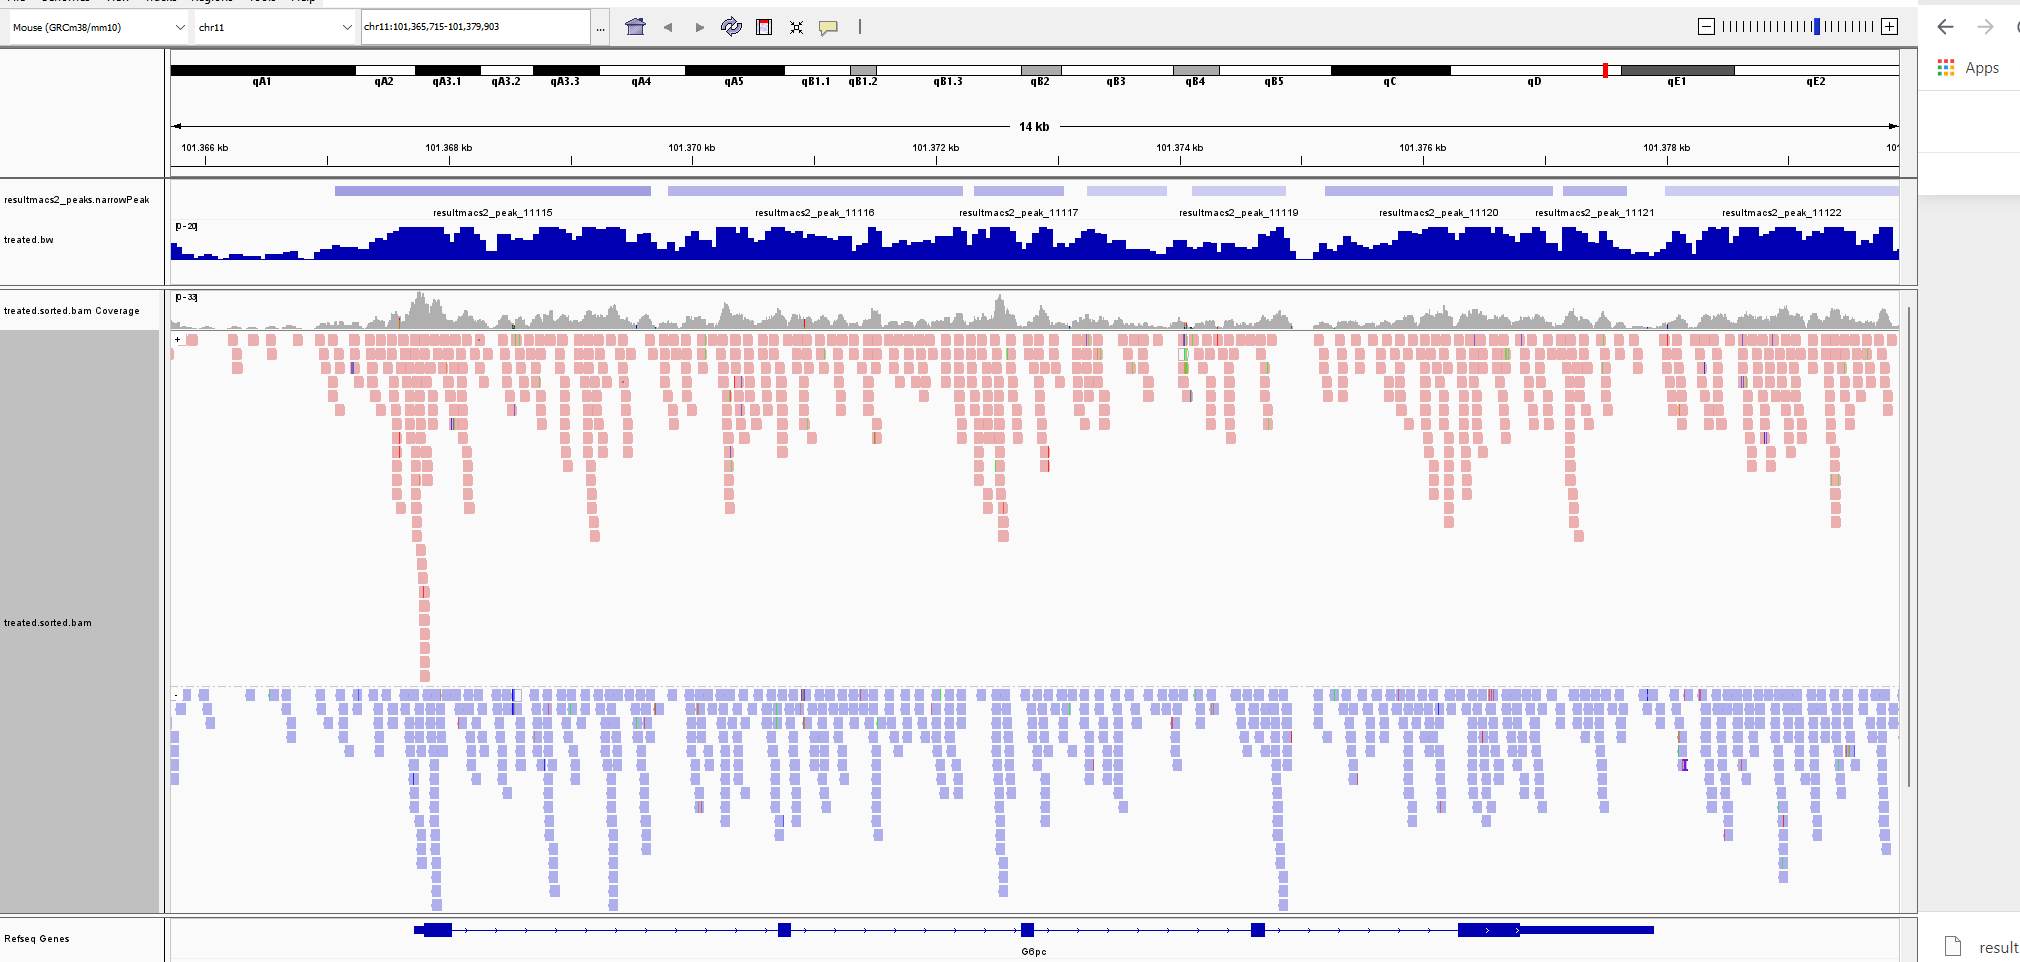

amount of peaks 

In [22]:
cat resultmacs2_peaks.narrowPeak | wc -l

65519


sort for the q-value in reverse order

In [33]:
cat resultmacs2_peaks.narrowPeak | sort -k9 -r | head -1000 < top1000.narrowpeak

chr17	86905374	86906042	resultmacs2_peak_27936	99	.	5.69265	12.56734	9.99660	469
chr17	83843985	83844511	resultmacs2_peak_27706	99	.	5.69265	12.56734	9.99660	201
chr11	74847968	74848404	resultmacs2_peak_9422	99	.	5.88572	12.56204	9.99139	247
chr2	155515921	155516199	resultmacs2_peak_36361	99	.	5.88572	12.56204	9.99139	149
chr18	11050673	11051117	resultmacs2_peak_28158	99	.	5.88572	12.56204	9.99139	146
chr7	31097738	31098074	resultmacs2_peak_54160	99	.	5.88572	12.56204	9.99139	119
chr3	94693332	94693874	resultmacs2_peak_38983	99	.	5.50629	12.56112	9.99059	374
chr16	18088546	18089883	resultmacs2_peak_23426	998	.	21.66875	104.62379	99.89775	581
chr15	103246428	103246674	resultmacs2_peak_23013	99	.	6.08460	12.54446	9.97397	90
chr13	37632581	37633592	resultmacs2_peak_15723	99	.	6.08460	12.54446	9.97397	810
chr2	156362608	156363378	resultmacs2_peak_36424	99	.	6.08460	12.54446	9.97397	597
chr11	75133885	75134367	resultmacs2_peak_9442	99	.	6.08460	12.54446	9.97397	217
chr15	75592284	75593321	r

In [34]:
cat top1000.narrowpeak

chr17	86905374	86906042	resultmacs2_peak_27936	99	.	5.69265	12.56734	9.99660	469
chr17	83843985	83844511	resultmacs2_peak_27706	99	.	5.69265	12.56734	9.99660	201
chr11	74847968	74848404	resultmacs2_peak_9422	99	.	5.88572	12.56204	9.99139	247
chr2	155515921	155516199	resultmacs2_peak_36361	99	.	5.88572	12.56204	9.99139	149
chr18	11050673	11051117	resultmacs2_peak_28158	99	.	5.88572	12.56204	9.99139	146
chr7	31097738	31098074	resultmacs2_peak_54160	99	.	5.88572	12.56204	9.99139	119
chr3	94693332	94693874	resultmacs2_peak_38983	99	.	5.50629	12.56112	9.99059	374
chr16	18088546	18089883	resultmacs2_peak_23426	998	.	21.66875	104.62379	99.89775	581
chr15	103246428	103246674	resultmacs2_peak_23013	99	.	6.08460	12.54446	9.97397	90
chr13	37632581	37633592	resultmacs2_peak_15723	99	.	6.08460	12.54446	9.97397	810
chr2	156362608	156363378	resultmacs2_peak_36424	99	.	6.08460	12.54446	9.97397	597
chr11	75133885	75134367	resultmacs2_peak_9442	99	.	6.08460	12.54446	9.97397	217
chr15	75592284	75593321	r

In [37]:
cat top1000.narrowpeak | wc -l

1000


In [39]:
cat top1000.narrowpeak | cut -f 1-3 > result-full_peaks.bed

In [49]:
cat result-full_peaks.bed

chr17	86905374	86906042
chr17	83843985	83844511
chr11	74847968	74848404
chr2	155515921	155516199
chr18	11050673	11051117
chr7	31097738	31098074
chr3	94693332	94693874
chr16	18088546	18089883
chr15	103246428	103246674
chr13	37632581	37633592
chr2	156362608	156363378
chr11	75133885	75134367
chr15	75592284	75593321
chr7	46730532	46730877
chr13	52041390	52042074
chr11	103954134	103954382
chr9	108082227	108082536
chr11	6000860	6001177
chr14	25401288	25402484
chr12	84398908	84399993
chr18	75385569	75386958
chr7	99154021	99154985
chr9	48723066	48724189
chr7	90040971	90041992
chr12	7987527	7992044
chr15	102187434	102189281
chr9	78520056	78522109
chr14	30868960	30869800
chr7	80184656	80185829
chr7	18957105	18957809
chr4	105220613	105221749
chr2	158767522	158768718
chr7	28829645	28832697
chr11	87662145	87663327
chr14	63268274	63269435
chr17	45618967	45620185
chr9	48617977	48618978
chr8	115539520	115540297
chr11	61761621	61762532
chr8	126970468	126971406
chr11	80145638	80146291
chr14	34769040	347

In [40]:
computeMatrix reference-point \
    -S treated.bw \
    -R result-full_peaks.bed \
    --referencePoint center \
    -a 2000 \
    -b 2000 \
    --binSize 5 \
    -out result-full.tab.gz

In [41]:
plotHeatmap \
    -m result-full.tab.gz \
    -out peaksFigure.png \
    --heatmapHeight 15  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal'

/usr/local/lib/python3.6/dist-packages/deeptools/plotHeatmap.py:452: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu"))

/usr/local/lib/python3.6/dist-packages/deeptools/plotHeatmap.py:721: MatplotlibDeprecationWarning:

The 'alpha' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.

/usr/local/lib/python3.6/dist-packages/deeptools/plotHeatmap.py:729: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "pdd_inches" which is no longer supported as of 3.3 and will become an error two minor releases later



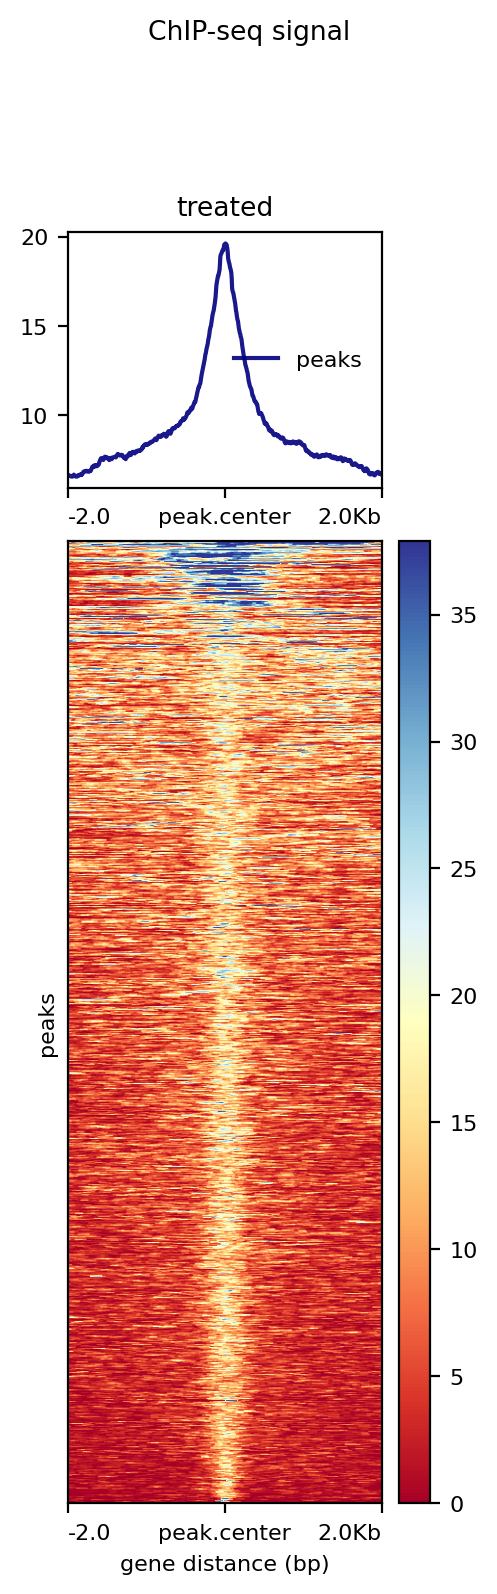

# 6) de novo motif discovery

In [27]:
fastaFromBed -fi /mnt/storage/data/resources/mm10/mm10.fa -bed result-full_peaks.bed -fo results.fasta



The peak-motif algorithm of RSAT was ran with the earlier generated .bed-file against the hg38 genome to obtain the sequences of the motifs in the peaks.

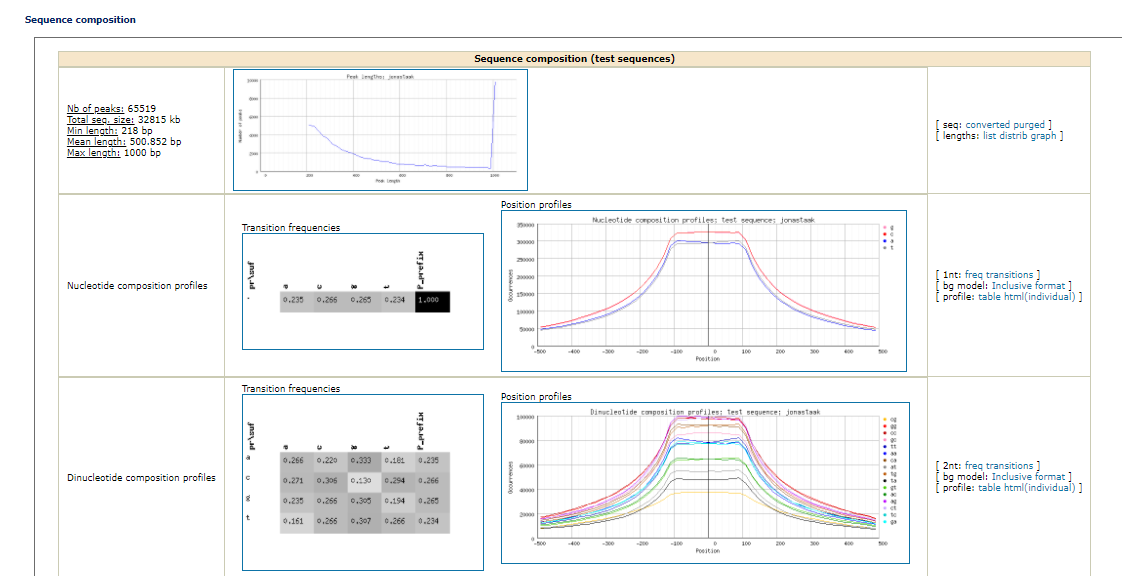

Below you can find the recognition motif of the FOXO1 transcription factor. This transcription is supposed to be directly bound by CtBP2 according to the research paper.

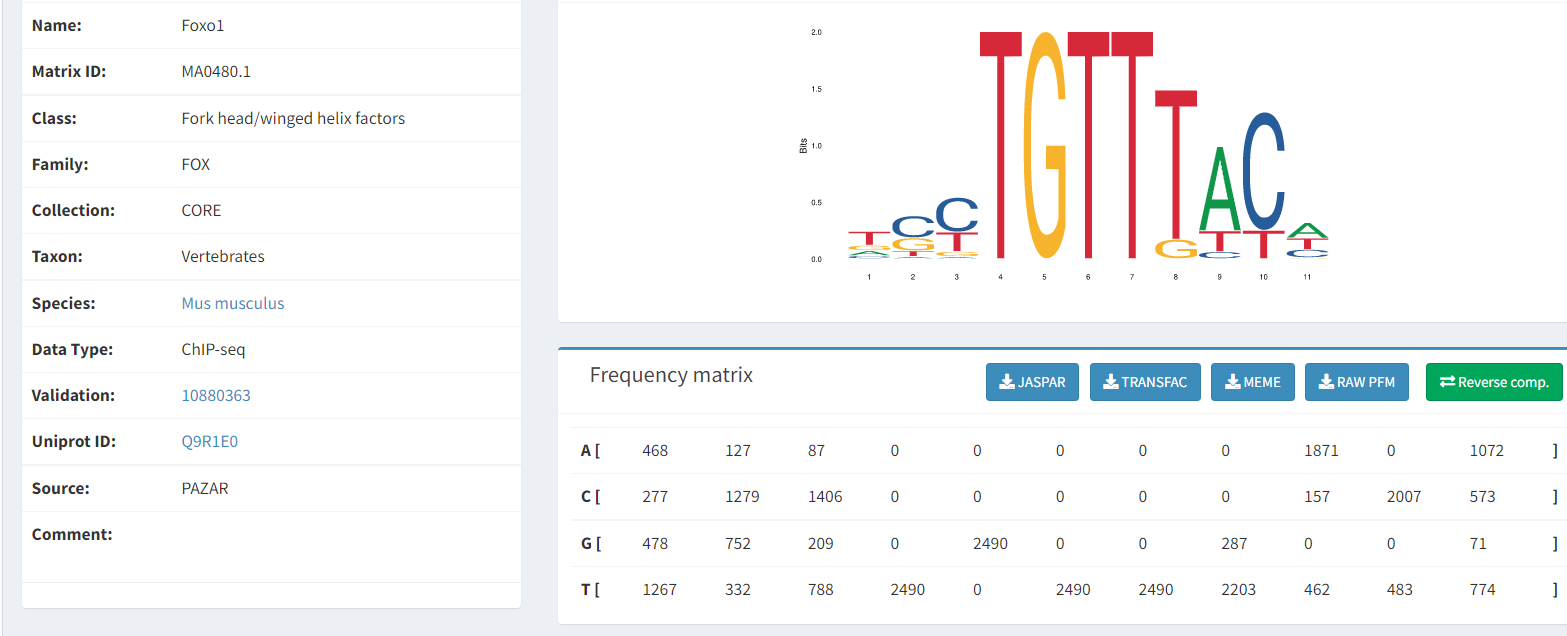

The second returned motif was chosen for further analysis and was present at 350 sites. This motif contains the main recognition sequence of the putative transcription factor (TGTT) however the returned motif is longer. There were arguably closer matches to the actual recognition sequence both they were way less significant hence this motif was chosen. The choice of this sequence for further analysis can be argued against especially because the matches don't really occur at a higher frequency at the center and the peaks don't have a single motif instance.

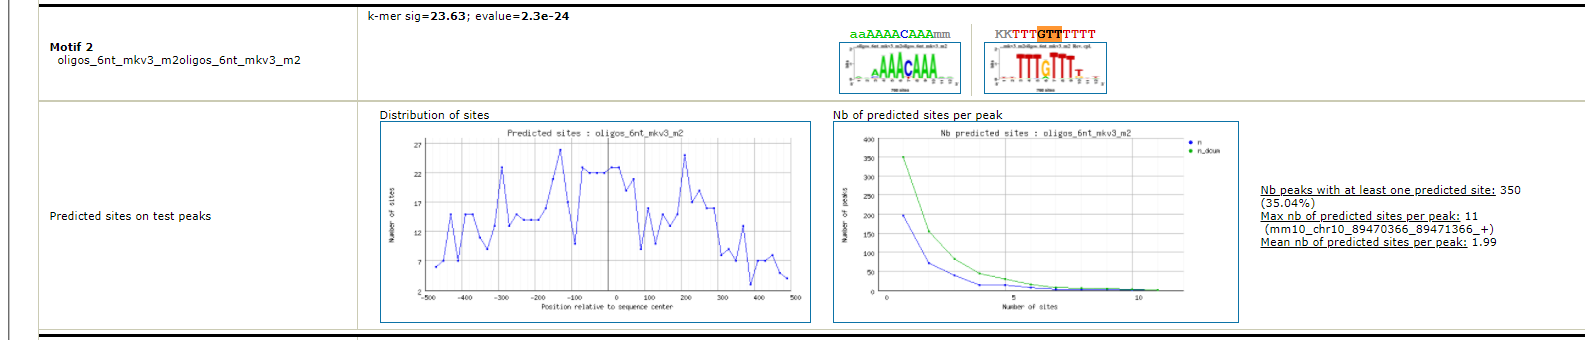

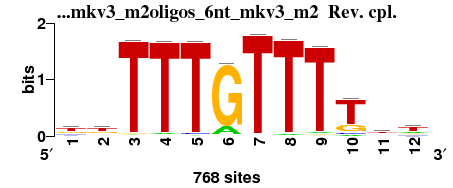

# 7) Create a .bed-file with only the peaks with the FOXO1 motif.


In [42]:
cat peak-motifs_oligos_6nt_mkv3_m2_sites.tab | grep -v ";" | grep -v '#' | head

mm10_chr17_83843986_83844511_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	R	-54	-43	AAAAAACAATAA	8.8
mm10_chr17_83843986_83844511_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	R	-40	-29	AAAAAACAAAAA	11.9
mm10_chr7_31097739_31098074_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	R	11	22	AGAAAACAAAAC	10.7
mm10_chr13_37632582_37633592_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	D	-270	-259	AGAAAATAAAAA	9.6
mm10_chr12_84398909_84399993_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	R	-403	-392	ATTAAACAAATC	8.8
mm10_chr12_84398909_84399993_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	R	-8	3	ACATAACAAAAA	8.8
mm10_chr9_48723067_48724189_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	D	-434	-423	CAAAAACATAAA	7.9
mm10_chr9_48723067_48724189_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	D	-153	-142	AAGAAACAAATT	7.8
mm10_chr9_48723067_48724189_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	D	19	30	TTAAAATAAACA	9.3
mm10_chr14_30868961_30869800_+	site	oligos_6nt_mkv3_m2oligos_6nt_mkv3_m2	D	-364	-353	ATCAAACAAACT	8.8

In [46]:
cat peak-motifs_oligos_6nt_mkv3_m2_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > FOXO1-allpeaks-with-motif-RSAT.bed

In [47]:
cat FOXO1-allpeaks-with-motif-RSAT.bed

chr17	83843986	83844511
chr17	83843986	83844511
chr7	31097739	31098074
chr13	37632582	37633592
chr12	84398909	84399993
chr12	84398909	84399993
chr9	48723067	48724189
chr9	48723067	48724189
chr9	48723067	48724189
chr14	30868961	30869800
chr14	30868961	30869800
chr14	30868961	30869800
chr7	80184657	80185829
chr7	18957106	18957809
chr7	18957106	18957809
chr7	18957106	18957809
chr7	18957106	18957809
chr4	105220614	105221749
chr11	87662146	87663327
chr11	87662146	87663327
chr17	45618968	45620185
chr17	45618968	45620185
chr11	61761622	61762532
chr8	126970469	126971406
chr19	3905115	3906227
chr5	96911384	96912546
chr6	72552514	72553289
chr6	72552514	72553289
chr6	72552514	72553289
chr13	37451859	37452358
chr4	61811104	61811725
chr5	135763389	135763856
chr17	84145680	84146681
chr4	108077396	108078574
chr13	35991184	35991592
chr2	69341738	69342331
chr15	82380472	82381434
chr15	82380472	82381434
chr17	71195764	71196185
chr4	43419641	43423095
chr14	66090480	66092799
chr14	66090480	66092799
chr11	

In [48]:
cat FOXO1-allpeaks-with-motif-RSAT.bed | wc -l

698


# 8) Enrichment using the i-cisTarget algorithm for regulatory elements

The 24th feature corresponded to the FOXO1 transcription, besides this one several other FOXO-1 related factors were found by the algorithm meaning I can continue my analysis and that everything is going to plan. The resulting .bed-file of this motif containing the regions in the leading edge was downloaded and will be analyzed in the following cells.

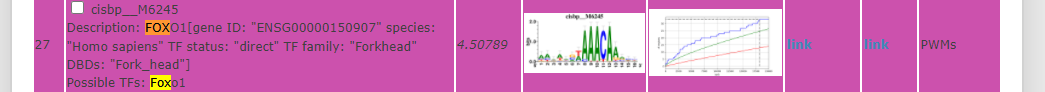

In [53]:
cat cisbp__M6245.targets.bed | head 

track name=cisbp__M6245_candidate_targets description="" useScore=1
chr3	96557385	96557695	chr3:96557385-96557695
chr11	85833513	85833722	chr11:85833513-85833722
chr9	120571277	120571627	chr9:120571277-120571627
chr9	48737494	48737843	chr9:48737494-48737843
chr5	38480293	38480583	chr5:38480293-38480583
chr15	79950535	79950880	chr15:79950535-79950880
chr15	99866495	99866697	chr15:99866495-99866697
chr7	19819715	19820015	chr7:19819715-19820015
chr19	7495951	7496123	chr19:7495951-7496123


In [55]:
cat  cisbp__M6245.targets.bed | wc -l

33


The leading edge enriched for the motif above contains 33 seperate regions

###  9) Link peaks to genes using the GREAT algorithm

Looking at the associated GO bioprocesses with our peaks we see significant enrichment for processes related to lipid metabolism, this is in line with the findings in the paper meaning everything is going fine. The table of the genes linked to the lipid metabolic process were downloaded from the server.

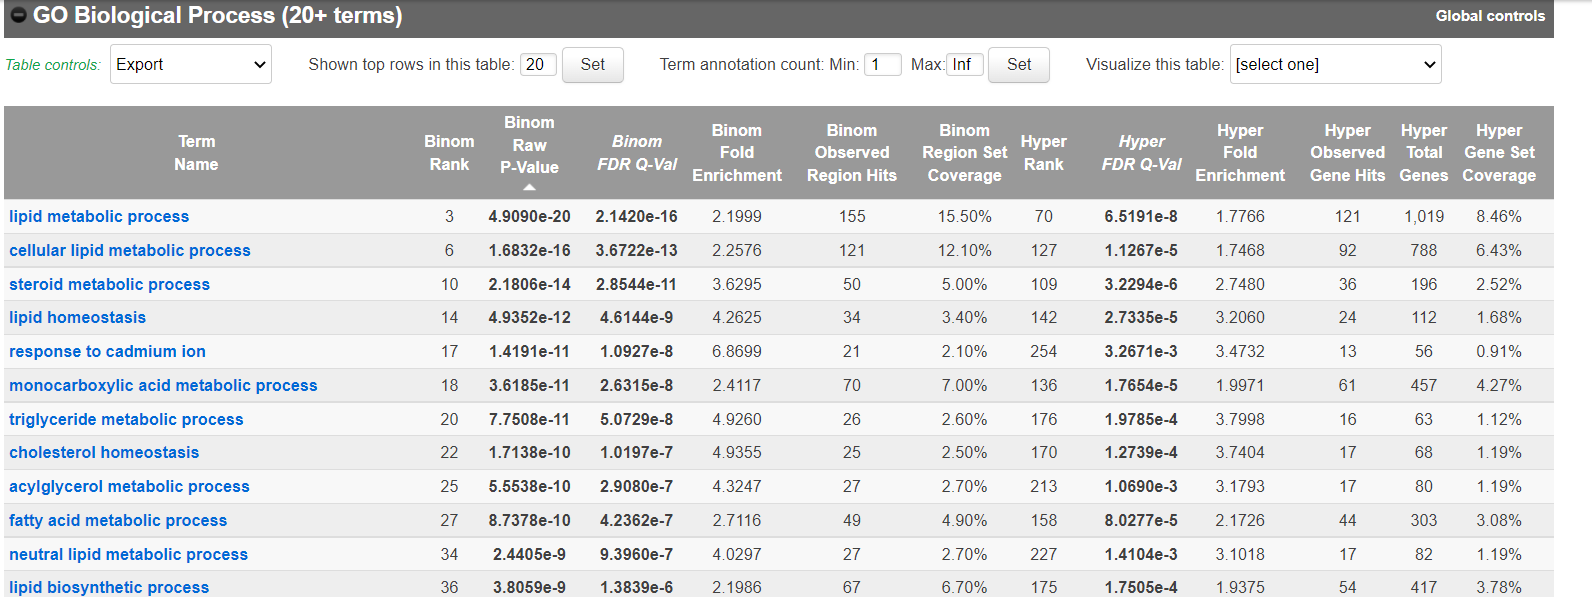

In [56]:
cat 20211213-public-4.0.4-RijST0-mm10-GOBiologicalProcess-GO_0006629-region.txt | cut -f 1 | grep -v '#' | wc -l

156


In [57]:
cat 20211213-public-4.0.4-RijST0-mm10-GOBiologicalProcess-GO_0006629-region.txt | cut -f 1 | grep -v '#' > FOXO1-targets-GREAT.txt

# 10) Comparison of predicted targets with functional associations to FOXO1

The String-database was used to generate a network of associated genes to FOXO1. This network g-however didn't contain the mentioned proteins from the paper. This however can be possibly due to the relatively new nature of the used research paper and hence the lack of follow up studies.

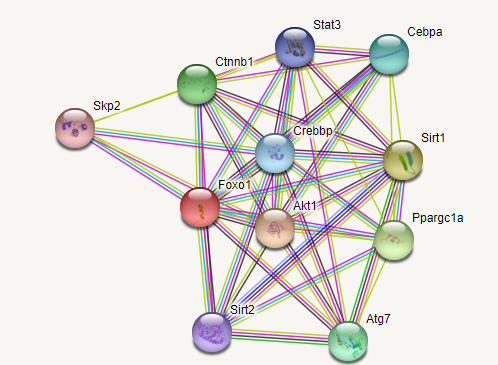

# 11) Conclusion

First of all from the QC-analysis of both sequences it is clear that both sequences were of relatively high sequencing quality. Next the sequences where mapped to mm10 assembly of the house mouse (Mus musculus) were both sequences mapped with at leasst 84% to its reference genome further indicating a high quality of the raw data. After mapping to the genome both sequences were visualized in IGV and there it was checked for the presence of reads for a target gene by the research paper (G6PC). All instances of the visualization indicated a presence of reads for this gene meaning that the mapping was done correctly. 

After the first visualilzation genome-wide coverage plots were generated along with peak calling on the treated sample. Visualization of both instances again indicated that there were a multitude of peaks for this target gene meaning that is likely to be affected by CtBP2. The peak calling algorithm was able to identify 65519 seperate peaks for the sequence from this the top 1000 peaks were selected based on their log-q value. These top 1000 peaks were then used for further analysis.

After generating a heatmap plot of the top 1000 peaks the peak-motif algorithm from RSAT was used to identify motifs de novo. By analyzing the output from this algoritm the second most significant result was chosen for further analysis due to it containing the key part of the recognition motif of FOXO1 (TGTT). Next a table of all peaks containing this motif were downloaded for further manipulation so it would only contain the direct peaks with the FOXO1 motif. 

This newly generated .bed-file was then used as an input in the i-cisTarget algorithm to search for possible enrichment for the FOXO1 protein. This was relatively succesful indicated by the fact that the 27th result corresponded to the transcription factor of interest. The .bed-file for this result was downloaded from the server and was used in the penultimate step as input for the GREAT-algorithm. This algorithm was used to look for associated bioprocesses with the generated peaks from the ChiP-seq. And from this I was able to confirm the role of CtbP2 binding to FOXO1 was important for the regulation of several lipid-associated processes. Finally the list of genes associated with the primary GO-term (lipid metabolic process) were downloaded and used as input in the String-database. The result from set database gave an interconnectedd web of proteins associated with FOXO1.

